In [12]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import matplotlib.gridspec as gridspec
import matplotlib.animation as anim

In [13]:
class house:
    def __init__(self, dimensions, step, border_indexes):
        self.dimensions = dimensions
        self.step = step
        self.border_indexes = border_indexes
        self.matrix = np.zeros(dimensions)
        self.rooms = []
        for number, room in self.border_indexes.items():
            self.matrix[min(list(zip(*room))[0]):max(list(zip(*room))[0]), min(list(zip(*room))[1]):max(list(zip(*room))[1])] = number 
            self.rooms.append(self.matrix[min(list(zip(*room))[0]):max(list(zip(*room))[0]), min(list(zip(*room))[1]):max(list(zip(*room))[1])])
    def welcome(self):
        plt.imshow(self.matrix)
    def show_rooms(self):
        return self.rooms
    def show_map(self):
        tmp = self.matrix.copy()
        tmp[self.matrix != 0] = 1
        plt.imshow(tmp)

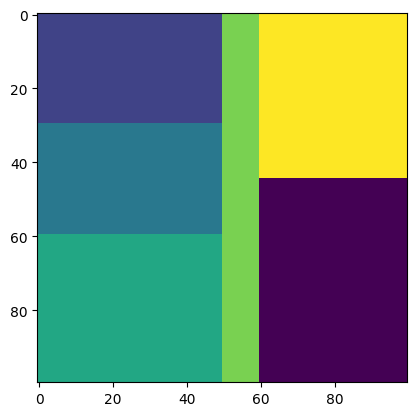

In [14]:
borders = {
    1 : [(0, 0), (0,50), (30,50), (30,0)], 
    2 : [(30, 0), (30,50), (60,50), (60,0)],
    3 : [(60, 0), (60,50), (100,50), (100,0)],
    4 : [(0, 50), (0,60), (100,60), (100,50)],
    5 : [(0, 60), (0,100), (45,100), (45,60)],
}
a = house((100,100), 1, borders)
a.welcome()

In [15]:
# Pisanie na nowo
################################
f = 75
h_x, h_t = 1, 1

x = np.arange(0, 10, h_x)
x, y = np.meshgrid(x, x, copy=False)
t = np.arange(0, 60*120+h_t, h_t)

diff_coeff = 0.01
################################

u = np.zeros((len(t), len(x), len(x)))
u[0,:,:] = 288

for j in np.arange(1,len(t),1): 
    u[j, 1:-1 , 1:-1] = u[j-1, 1:-1 , 1:-1] + diff_coeff*h_t/h_x**2*(u[j-1, 2:, 1:-1] + u[j-1, 0:-2, 1:-1] + u[j-1, 1:-1, 2:] + u[j-1, 1:-1, 0:-2]-4*u[j-1, 1:-1 , 1:-1])
    u[j, -1 , :] = u[j, -2 , :]
    u[j, 0 , :] = u[j, 1 , :]
    u[j, : , -1] = u[j, : , -2]
    u[j, : , 0] = u[j, : , 1] 
    if np.mean(u[j-1, : , :]) <= 296:
        u[j, 5 , 5] += h_t*f
    
    


In [16]:
solution_d_cp = u[0::60, :, :]
t_cp = t[60::]

fig = plt.figure(figsize=(12, 5), facecolor='white')
fig.suptitle("Gierer-Meinhardt system solution \\ $u := u(x,y,t)$")

gs = gridspec.GridSpec(1, 2)

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.set_xlim((np.min(x), np.max(x)))
ax1.set_ylim((np.min(x), np.max(x)))
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.set_title("Dirichlet boundary condition")

ax2.set_xlim((np.min(x), np.max(x)))
ax2.set_ylim((np.min(x), np.max(x)))
ax2.set_xlabel("$x$")
ax2.set_ylabel("$y$")
ax2.set_title("Neumann boundary condition")

pcolormesh_d = ax1.pcolormesh(x, y, solution_d_cp[0,:,:], shading='gouraud')

cb1 = fig.colorbar(pcolormesh_d,ax=ax1)

def animation(j):
    pcolormesh_d.set_array(solution_d_cp[j,:, :].ravel())
    ax1.set_title(j)
    return pcolormesh_d

anim = anm.FuncAnimation(fig,
                         func = animation,
                         frames = solution_d_cp.shape[0],
                         interval = 100,
                         blit = False
                         )
plt.close()
plt.rc('animation', html='jshtml')
anim